In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo procesado
df = pd.read_csv("../data/processed/prices_features.csv", parse_dates=["datetime"])

# Ver las primeras filas
df.head()


,coin,datetime,price,volume,ret_log,vol_rolling,volumen_promedio,drawdown
0,avalanche-2,2024-12-06,50.621868,1.550537e+09,NaN,NaN,NaN,0.000000
1,avalanche-2,2024-12-07,52.657180,1.059220e+09,0.039419,NaN,NaN,0.000000
2,avalanche-2,2024-12-08,51.757540,5.957050e+08,-0.017232,NaN,NaN,-0.017085
3,avalanche-2,2024-12-09,54.181289,8.137661e+08,0.045766,NaN,NaN,0.000000
4,avalanche-2,2024-12-10,45.188717,1.822937e+09,-0.181488,NaN,NaN,-0.165972


In [17]:
df.columns

Index(['coin', 'datetime', 'price', 'volume', 'ret_log', 'vol_rolling',
       'volumen_promedio', 'drawdown'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coin              3660 non-null   object        
 1   datetime          3660 non-null   datetime64[ns]
 2   price             3660 non-null   float64       
 3   volume            3660 non-null   float64       
 4   ret_log           3650 non-null   float64       
 5   vol_rolling       3360 non-null   float64       
 6   volumen_promedio  3370 non-null   float64       
 7   drawdown          3660 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 228.9+ KB


In [19]:
df.describe()

,datetime,price,volume,ret_log,vol_rolling,volumen_promedio,drawdown
count,3660,3660.000000,3.660000e+03,3650.000000,3360.000000,3.370000e+03,3660.000000
mean,2025-06-06 11:58:48.197814272,10640.367526,9.565670e+09,-0.001967,0.040749,9.161266e+09,-0.365174
min,2024-12-06 00:00:00,0.000008,7.200625e+07,-0.303329,0.011355,1.458309e+08,-0.809592
25%,2025-03-07 00:00:00,0.745638,5.390736e+08,-0.023927,0.031951,5.358304e+08,-0.570161
50%,2025-06-06 12:00:00,11.766345,1.798942e+09,-0.000590,0.040216,1.797401e+09,-0.359504
75%,2025-09-06 00:00:00,689.847238,7.793761e+09,0.020299,0.048295,7.773719e+09,-0.171384
max,2025-12-05 16:43:16,124773.508231,1.904603e+11,0.547726,0.127833,7.588372e+10,0.000000
std,NaN,30785.992614,1.812569e+10,0.043538,0.015279,1.515544e+10,0.217219


In [20]:
df['coin'].unique()

array(['avalanche-2', 'binancecoin', 'bitcoin', 'cardano', 'dogecoin',
       'ethereum', 'polkadot', 'ripple', 'shiba-inu', 'solana'],
      dtype=object)

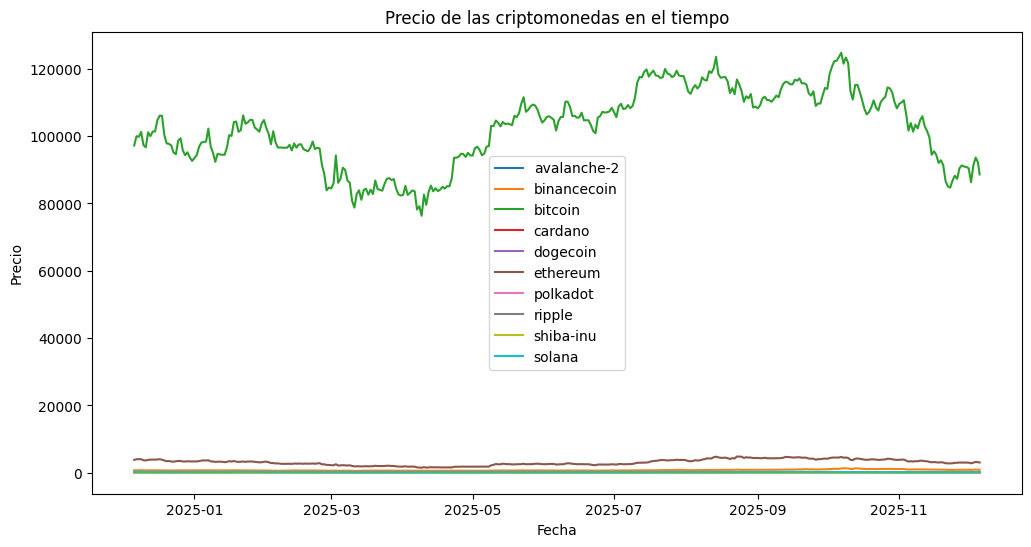

In [21]:
coins = df["coin"].unique()

plt.figure(figsize=(12, 6))

for coin in coins:
    subset = df[df["coin"] == coin]
    plt.plot(subset["datetime"], subset["price"], label=coin)

plt.title("Precio de las criptomonedas en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()


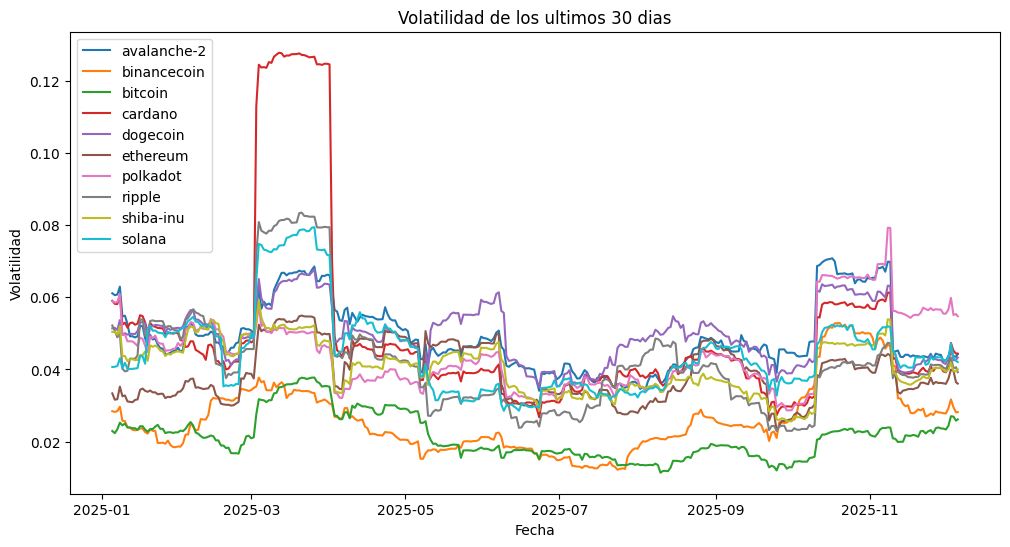

In [22]:
plt.figure(figsize=(12, 6))

for coin in coins:
    subset = df[df["coin"] == coin]
    plt.plot(subset["datetime"], subset["vol_rolling"], label=coin)

plt.title("Volatilidad de los ultimos 30 dias")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad")
plt.legend()
plt.show()


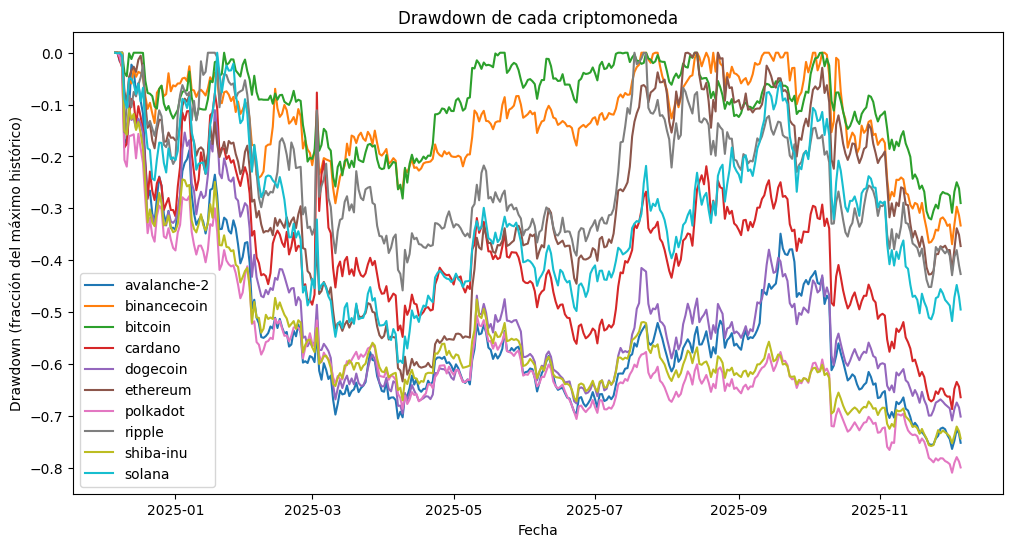

In [23]:
plt.figure(figsize=(12, 6))

for coin in coins:
    subset = df[df["coin"] == coin]
    plt.plot(subset["datetime"], subset["drawdown"], label=coin)

plt.title("Drawdown de cada criptomoneda")
plt.xlabel("Fecha")
plt.ylabel("Drawdown (fracción del máximo histórico)")
plt.legend()
plt.show()


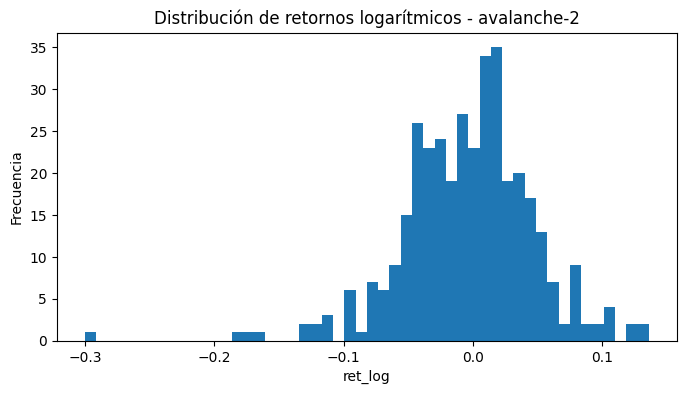

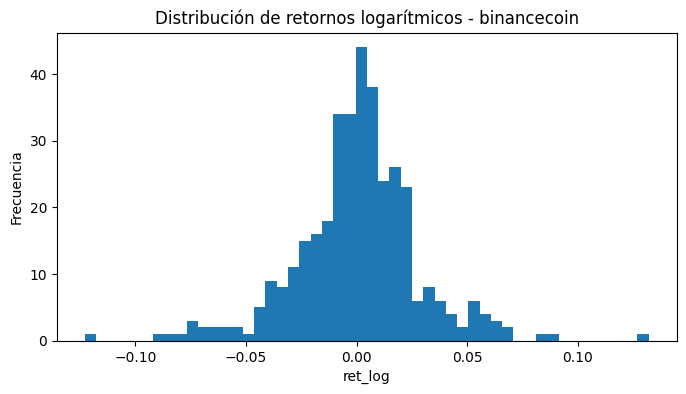

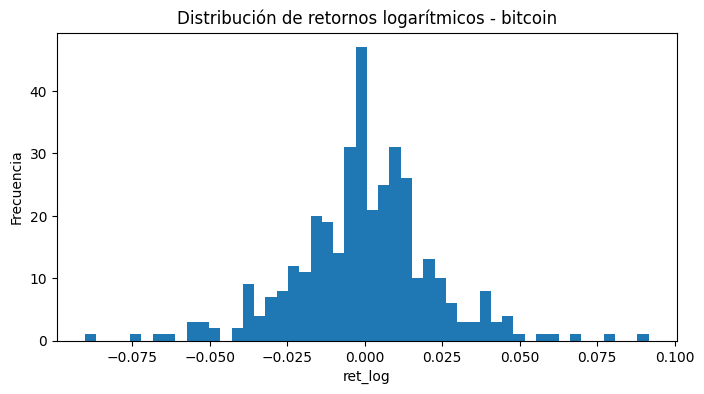

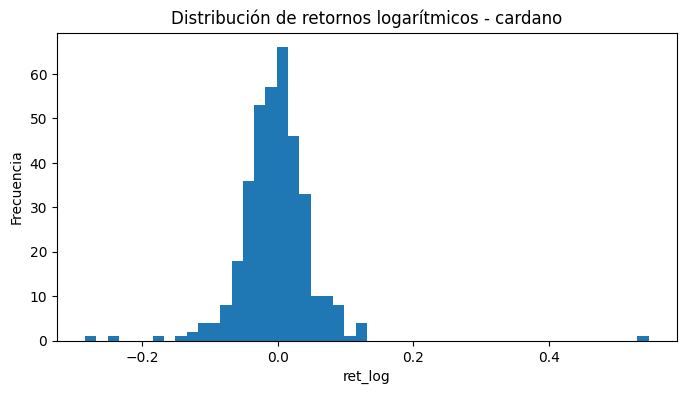

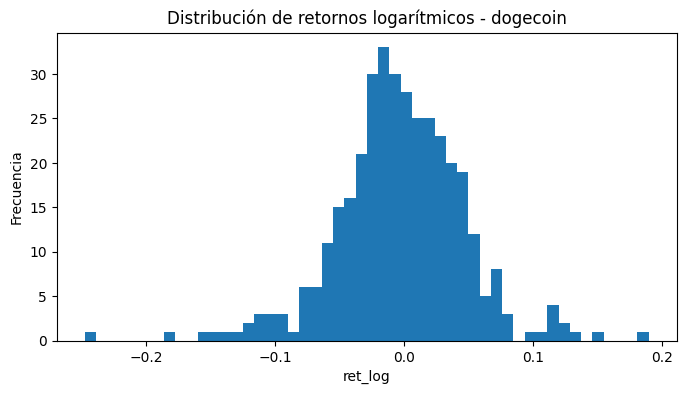

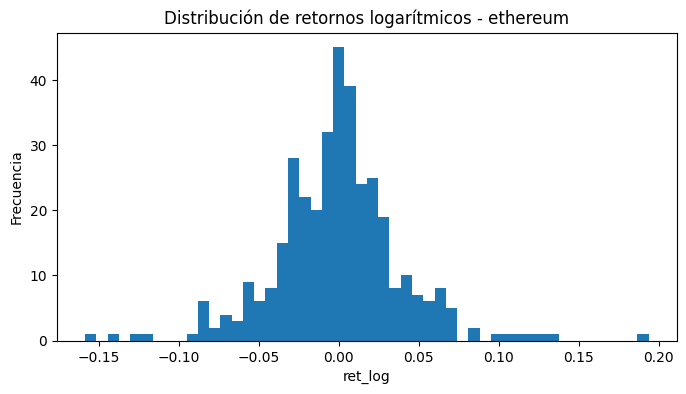

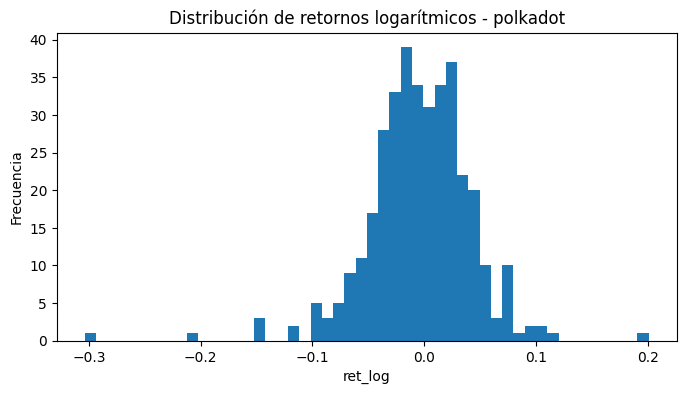

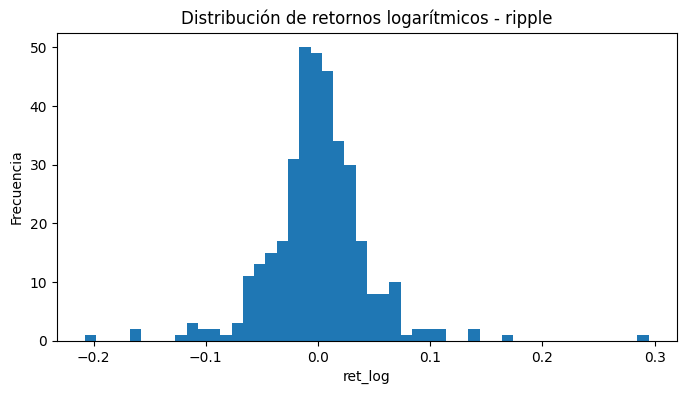

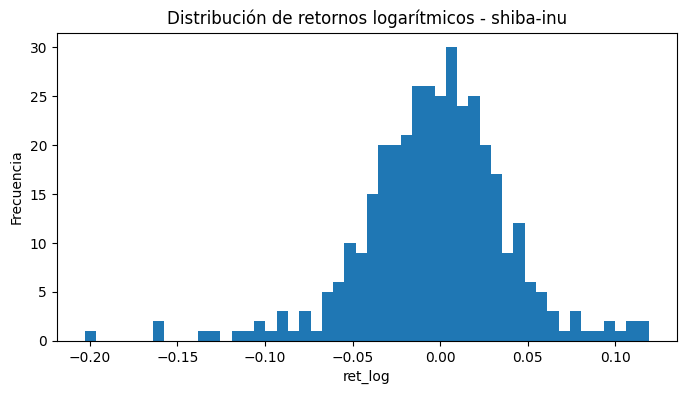

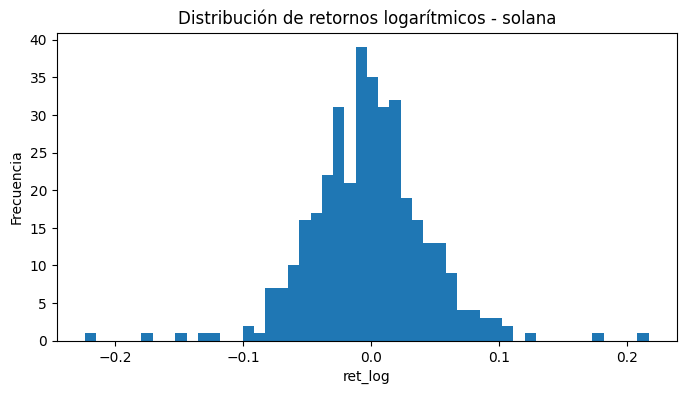

In [24]:
import seaborn as sns  

for coin in coins:
    subset = df[df["coin"] == coin]
    plt.figure(figsize=(8, 4))
    plt.hist(subset["ret_log"].dropna(), bins=50)
    plt.title(f"Distribución de retornos logarítmicos - {coin}")
    plt.xlabel("ret_log")
    plt.ylabel("Frecuencia")
    plt.show()


In [25]:
#Ya hice el custering en clustering.py, vamos a visualizarlo
import pandas as pd
import matplotlib.pyplot as plt

df_clusters = pd.read_csv("../data/processed/crypto_clusters.csv")
df_clusters



,coin,ret_mean,vol_mean,volume_mean,dd_min,cluster
0,avalanche-2,-0.003633,0.049109,5.793284e+08,-0.763773,0
1,binancecoin,0.000535,0.026231,1.591047e+09,-0.369155,2
2,bitcoin,-0.000253,0.021381,4.487929e+10,-0.321309,2
3,cardano,-0.002836,0.049937,1.256701e+09,-0.687010,0
4,dogecoin,-0.003082,0.049818,2.779010e+09,-0.708944,0
5,ethereum,-0.000619,0.038911,2.789044e+10,-0.633605,1
6,polkadot,-0.004329,0.044485,2.893473e+08,-0.809592,0
7,ripple,-0.000275,0.042227,5.529172e+09,-0.458163,1
8,shiba-inu,-0.003585,0.040699,2.855099e+08,-0.758046,0
9,solana,-0.001595,0.044688,6.532809e+09,-0.598241,1


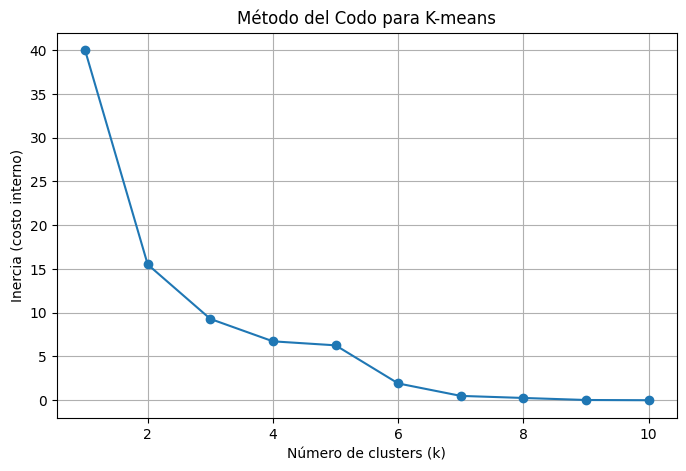

In [30]:
import sys
import os

# Agregar la carpeta raíz del proyecto al path
# El notebook está en /notebooks, así que subimos un nivel
root_path = os.path.abspath("..") #Esta vuelta sube el notebook una carpeta más arriba para que asi vea el src
sys.path.append(root_path)

from src.clustering import build_features_per_coin, compute_elbow_curve

# Construir dataset agregado por moneda
agg = build_features_per_coin("../data/processed/prices_features.csv")

# Calcular inercia para k = 1..10
inertias = compute_elbow_curve(agg, max_clusters=10)

# Graficar curva del codo
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (costo interno)")
plt.title("Método del Codo para K-means")
plt.grid(True)
plt.show()


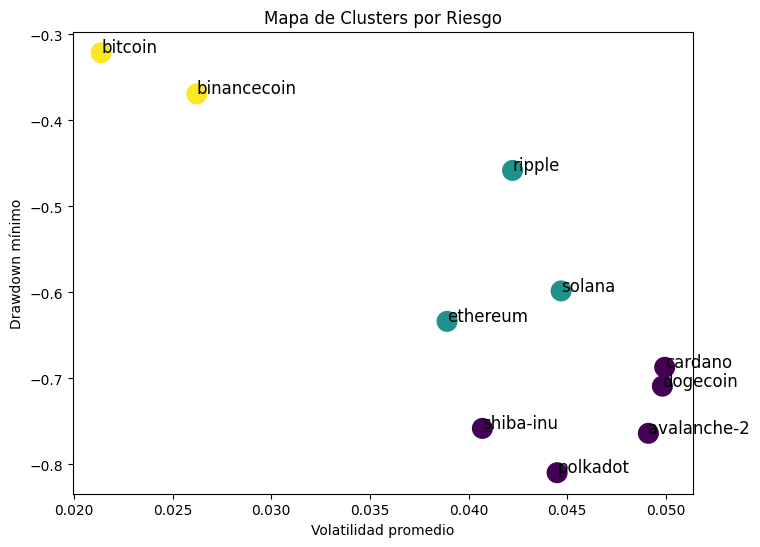

In [31]:
plt.figure(figsize=(8,6))

plt.scatter(
    df_clusters["vol_mean"], 
    df_clusters["dd_min"], 
    c=df_clusters["cluster"], 
    s=200
)

for i, row in df_clusters.iterrows():
    plt.text(row["vol_mean"], row["dd_min"], row["coin"], fontsize=12)

plt.xlabel("Volatilidad promedio")
plt.ylabel("Drawdown mínimo")
plt.title("Mapa de Clusters por Riesgo")
plt.show()
